In [1]:
import pandas as pd
import numpy as np
import os
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

os.chdir("C:\\Users\\dalto\\Desktop\\Estágio\\Data Science")

In [2]:
dolar= pd.read_excel("analise_mod.xlsx")
dolar.head()

,Data,Abertura,Máxima,Mínima,Fechamento,Média,Bloco,Range,Max-Abe,Abe-Min
0,2021-08-05,5140.0,5275.5,5128.5,5270.0,147.0,1,147.0,135.5,11.5
1,2021-08-03,5183.5,5294.5,5183.0,5220.0,111.5,1,111.5,111.0,0.5
2,2021-07-30,5095.0,5249.0,5095.0,5233.0,154.0,1,154.0,154.0,0.0
3,2021-07-22,5186.5,5229.5,5173.5,5205.5,56.0,1,56.0,43.0,13.0
4,2021-07-19,5168.5,5265.5,5159.5,5259.0,106.0,1,106.0,97.0,9.0


In [3]:
upDown = input('Você quer acessar dias de alta ou queda?')
info = input('Você quer acessar a possível máxima(1), a possível mínima(2) ou a amplitude total esperada(3)')
#data = input('A partir de que dia você gostaria de acessar essa informação')
data = int(input('Você quer analisar os resultados de quantos dias no passado'))

Você quer acessar dias de alta ou queda?alta
Você quer acessar a possível máxima(1), a possível mínima(2) ou a amplitude total esperada(3)3
Você quer analisar os resultados de quantos dias no passado200


In [4]:
dt=datetime.datetime.now() - datetime.timedelta(data)
dt=str(dt)
dt[:10]

if upDown == "alta":
    mkt = "Mercado Comprador - "
    upDown2=1
else:
    
    mkt = "Mercado Vendedor - "
    upDown2=-1
print(upDown2)
if  info== '1':
    info="Max-Abe"
    mkt2 = "Máxima até Abertura"
elif info == '2':
    info="Abe-Min"
    mkt2 = "Possíveis Mínimas"
else : 
    mkt2 = "Máxima até Mínima"
    info="Range"
  
    
#doldol = dolar[dolar["Data"] > data]    
doldol = dolar[dolar["Data"] > dt]
total =len(doldol)
doldol = doldol[doldol["Bloco"] == upDown2]
#baixaJul = baixaUSD[(baixaUSD["Data"] > '2021-06-30') & (baixaUSD["Data"] < '2021-08-01')]
doldol = doldol[info]
atual = len(doldol)
print("foram ", atual, " dias de", upDown, "de um total de ", total, " pregões no periodo")

1
foram  40  dias de alta de um total de  104  pregões no periodo


In [5]:
bar = input('Quantas unidade de condensação você quer mostrar(x para default)')
if bar =='x':
    if atual<30:
        bar=8
    elif atual <45:
        bar= 10
    elif atual <60:
        bar=13
    elif atual <80:
        bar=17
    else:
       bar=21
bar=int(bar)
bar

Quantas unidade de condensação você quer mostrar(x para default)x


10

média:  94.65
mediana:  98.75
Desvio padrão:  32.7344012567975


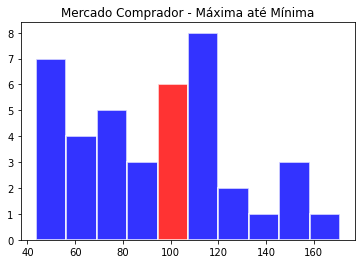

In [6]:
print("média: ", doldol.mean())
print("mediana: ", doldol.median())
print("Desvio padrão: ", doldol.std())

p=plt.hist(doldol, bins= bar
        , alpha = 0.8
        #, histtype = "stepfilled"
        , color="blue"
        , edgecolor = "white"#"none"
        , linewidth = 1.8
        )

bar_value_to_label = doldol.mean()
 
min_distance = float("inf")  # inicializa min_distance com infinito
index_of_bar_to_label = 0
for i, rectangle in enumerate(p[2]):  # Faz iterações para cada barra
    tmp = abs(  # tmp = distância entre o meio da barra e o valor 'bar_value_to_label'
        (rectangle.get_x() +
            (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
    if tmp < min_distance:  # Aqui se procura pela barra com o valor mais próximo do x de referência
                            # que no caso é a mediana
        min_distance = tmp
        index_of_bar_to_label = i
p[2][index_of_bar_to_label].set_color('r')
p[2][index_of_bar_to_label].set_edgecolor('w')

plt.title(mkt + mkt2)
plt.show();
#plt.grid();

In [ ]:

#config = dict(histtype = 'stepfilled', alpha = 0.35, density = True, bins = 50)

#config = dict( edgecolor = "red", alpha = 0.35, density = True, bins = 5)
config = dict( edgecolor = "red", alpha = 0.35, density = True, bins = 10)


plt.hist(JulAbeMaxDown, **config, label = "Julho")
#plt.hist(JunAbeMaxDown, **config, label = "Junho")
#plt.hist(MaiAbeMaxDown, **config, label = "Maio")
#plt.hist(AbrAbeMaxDown, **config, label = "Abril")

#formatação da legenda - válida para qualquer tipo de gráfico

plt.legend (loc = "upper left" #localização
           , frameon = True    #moldura
           , ncol = 2         #2 colunas
           , fancybox = True   #modificação no quadro
           , framealpha = 0.95  #transparência
           , shadow = True   #sombra
           , borderpad = 1)   #espessura da borda

plt.title("Diversas distribuições");

In [ ]:

#config = dict(histtype = 'stepfilled', alpha = 0.35, density = True, bins = 50)

#config = dict( edgecolor = "red", alpha = 0.35, density = True, bins = 5)
config = dict( edgecolor = "red", alpha = 0.35, density = True, bins = 10)

JJ=JunAbeMaxDown+JulAbeMaxDown
plt.hist(JJ, **config, label = "Julho+Junho")
plt.hist(baixaAbeMax, **config, label = "total")

#formatação da legenda - válida para qualquer tipo de gráfico

plt.legend (loc = "upper left" #localização
           , frameon = True    #moldura
           , ncol = 2         #2 colunas
           , fancybox = True   #modificação no quadro
           , framealpha = 0.95  #transparência
           , shadow = True   #sombra
           , borderpad = 1)   #espessura da borda

plt.title("Diversas distribuições");